# CAPSTONE PROJECT

## Import necessary Libraries

In [2]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation


!pip install geopy
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 


# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize


! pip install folium==0.5.0
import folium # plotting library


import json # library to handle JSON files

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans


print('Libraries imported.')

     |████████████████████████████████| 79 kB 6.8 MB/s  eta 0:00:01
  Created wheel for folium: filename=folium-0.5.0-py3-none-any.whl size=76240 sha256=393ac90411a4ab093259c8ddb9e5084fa12529bc57ba063a9834dfd7558be684
  Stored in directory: /tmp/wsuser/.cache/pip/wheels/b2/2f/2c/109e446b990d663ea5ce9b078b5e7c1a9c45cca91f377080f8
Successfully built folium
Libraries imported.


## Define Foursquare Credentials and Version

In [3]:
CLIENT_ID = 'XXXXXXXXX' # your Foursquare ID
CLIENT_SECRET = 'XXXXXXXXX' # your Foursquare Secret
VERSION = '20180604'

## Explore a location

In [4]:
# Chicago Lat Lon
latitude = 41.8781
longitude = -87.6298

LIMIT = 100
radius = 500

In [5]:
url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius, LIMIT)

Let's sample some data before we run the entire city

In [6]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5f8f9fbeedf6b74902d48a4b'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': '$-$$$$', 'key': 'price'},
    {'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'The Loop',
  'headerFullLocation': 'The Loop, Chicago',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 110,
  'suggestedBounds': {'ne': {'lat': 41.882600004500006,
    'lng': -87.62376749526736},
   'sw': {'lat': 41.8735999955, 'lng': -87.63583250473265}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '5751af74cd102f915c2cb3de',
       'name': 'Revival Food Hall',
       'location': {'address': '125 S Clark St',
        'crossStreet': 'W Adams St',
        'lat': 41.87956,
        'lng': -87.63055,
        'label

In [7]:
items = results['response']['groups'][0]['items']
items[0]

{'reasons': {'count': 0,
  'items': [{'summary': 'This spot is popular',
    'type': 'general',
    'reasonName': 'globalInteractionReason'}]},
 'venue': {'id': '5751af74cd102f915c2cb3de',
  'name': 'Revival Food Hall',
  'location': {'address': '125 S Clark St',
   'crossStreet': 'W Adams St',
   'lat': 41.87956,
   'lng': -87.63055,
   'labeledLatLngs': [{'label': 'display', 'lat': 41.87956, 'lng': -87.63055}],
   'distance': 174,
   'postalCode': '60603',
   'cc': 'US',
   'city': 'Chicago',
   'state': 'IL',
   'country': 'United States',
   'formattedAddress': ['125 S Clark St (W Adams St)',
    'Chicago, IL 60603',
    'United States']},
  'categories': [{'id': '4bf58dd8d48988d120951735',
    'name': 'Food Court',
    'pluralName': 'Food Courts',
    'shortName': 'Food Court',
    'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/food_foodcourt_',
     'suffix': '.png'},
    'primary': True}],
  'delivery': {'id': '1109598',
   'url': 'https://www.grubhub.com/resta

In [8]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [9]:
dataframe = json_normalize(items) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories'] + [col for col in dataframe.columns if col.startswith('venue.location.')] + ['venue.id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# filter the category for each row
dataframe_filtered['venue.categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean columns
dataframe_filtered.columns = [col.split('.')[-1] for col in dataframe_filtered.columns]

dataframe_filtered.head(10)

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:1: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  if __name__ == '__main__':


,name,categories,address,crossStreet,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,neighborhood,id
0,Revival Food Hall,Food Court,125 S Clark St,W Adams St,41.879560,-87.630550,"[{'label': 'display', 'lat': 41.87956, 'lng': ...",174,60603,US,Chicago,IL,United States,"[125 S Clark St (W Adams St), Chicago, IL 6060...",NaN,5751af74cd102f915c2cb3de
1,Garrett Popcorn Shops,Snack Place,27 W Jackson Blvd,South Plymouth Court,41.878175,-87.628882,"[{'label': 'display', 'lat': 41.87817454315991...",76,60604,US,Chicago,IL,United States,"[27 W Jackson Blvd (South Plymouth Court), Chi...",NaN,4b087e6ef964a520040d23e3
2,Native Foods,Vegetarian / Vegan Restaurant,218 South Clark,at W Adams St,41.878917,-87.631004,"[{'label': 'display', 'lat': 41.878917, 'lng':...",135,60604,US,Chicago,IL,United States,"[218 South Clark (at W Adams St), Chicago, IL ...",NaN,4ee52bf2b634710b8ba59fa2
3,Federal Plaza Farmer's Market,Farmers Market,Adams St,Dearborn Pkwy,41.878944,-87.629658,"[{'label': 'display', 'lat': 41.8789439787398,...",94,NaN,US,Chicago,IL,United States,"[Adams St (Dearborn Pkwy), Chicago, IL, United...",NaN,51ae191e498ed26634611a88
4,Intelligentsia Coffee,Coffee Shop,53 W Jackson Blvd,at S Dearborn St,41.878092,-87.629615,"[{'label': 'display', 'lat': 41.87809169951115...",15,60604,US,Chicago,IL,United States,"[53 W Jackson Blvd (at S Dearborn St), Chicago...",NaN,49d51ce3f964a520675c1fe3
5,Dollop Coffee & Tea,Coffee Shop,343 S Dearborn St,at W Van Buren St,41.876925,-87.628864,"[{'label': 'display', 'lat': 41.87692470762472...",152,60604,US,Chicago,IL,United States,"[343 S Dearborn St (at W Van Buren St), Chicag...",NaN,5396301d498e2660782b078a
6,Antique Taco Chiquito,Taco Place,125 S Clark St,W Adams St,41.879254,-87.630304,"[{'label': 'display', 'lat': 41.87925385003474...",135,60603,US,Chicago,IL,United States,"[125 S Clark St (W Adams St), Chicago, IL 6060...",NaN,57b47ca438fa7297c40076a9
7,Just Salad,Salad Place,20 E Jackson Blvd,NaN,41.878226,-87.626779,"[{'label': 'display', 'lat': 41.87822586629436...",250,60604,US,Chicago,IL,United States,"[20 E Jackson Blvd, Chicago, IL 60604, United ...",NaN,5525756d498e23c7ea711bc3
8,JW Marriott Chicago,Hotel,151 W Adams St,btwn S. Wells & S. LaSalle,41.879337,-87.632832,"[{'label': 'display', 'lat': 41.8793371, 'lng'...",286,60603,US,Chicago,IL,United States,"[151 W Adams St (btwn S. Wells & S. LaSalle), ...",NaN,4cc099891da0a1cd0bf694c6
9,Potbelly Sandwich Shop,Sandwich Place,55 W Monroe St Lbby 100D,at Dearborn St,41.880330,-87.629793,"[{'label': 'display', 'lat': 41.88033010006052...",248,60603,US,Chicago,IL,United States,"[55 W Monroe St Lbby 100D (at Dearborn St), Ch...",NaN,4b4388d5f964a520a3e225e3


Let's map these locations

In [10]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=15) # generate map centred around Chicago


# add Chicago as a red circle mark
folium.CircleMarker(
    [latitude, longitude],
    radius=10,
    popup='Chicago',
    fill=True,
    color='red',
    fill_color='red',
    fill_opacity=0.6
    ).add_to(venues_map)


# add popular spots to the map as blue circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        fill=True,
        color='blue',
        fill_color='blue',
        fill_opacity=0.6
        ).add_to(venues_map)

# display map
venues_map

Great! Looks like the API is working.  Let's proceed to running the entire market.

## Exploring Neighborhoods in Chicago

Open file that contains all of Chicago Neighborhoods

In [11]:
## Hidden cells in Jupyter
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

# hidden code from IBM
chi_neigh = pd.read_csv(body)
chi_neigh.head()


,pri_neigh,sec_neigh,shape_area,shape_len,Latitude,Longitude
0,Grand Boulevard,BRONZEVILLE,4.849250e+07,28196.837160,41.812949,-87.617860
1,Printers Row,PRINTERS ROW,2.162138e+06,6864.247156,41.870981,-87.629035
2,United Center,UNITED CENTER,3.252051e+07,23101.363750,41.881965,-87.679136
3,Sheffield & DePaul,SHEFFIELD & DEPAUL,1.048259e+07,13227.049750,41.927188,-87.653670
4,Humboldt Park,HUMBOLDT PARK,1.250104e+08,46126.751350,41.900889,-87.716507


Let's see how many neighborhoods are in Chicago.

In [12]:
num_neigh = chi_neigh.shape[0]
num_neigh

98

There are 98 neighborhoods in Chicago.

Triming neighbor dataframe to keep only relevant columns

In [13]:
chi_neigh_trim = chi_neigh[['pri_neigh','Latitude','Longitude']]

chi_neigh_trim.head()

,pri_neigh,Latitude,Longitude
0,Grand Boulevard,41.812949,-87.617860
1,Printers Row,41.870981,-87.629035
2,United Center,41.881965,-87.679136
3,Sheffield & DePaul,41.927188,-87.653670
4,Humboldt Park,41.900889,-87.716507


Verifying number of neighborhoods in trimmed dataframe

In [14]:
chi_neigh_trim.shape[0]

98

## Function to explore all the neighborhoods (taken from week 3 of course)

In [15]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        

        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)



# Pulling data from FOURSQUARE and Creating data frame of Chicago Venues

In [19]:
chicago_venues = getNearbyVenues(names=chi_neigh_trim['pri_neigh'],
                                   latitudes=chi_neigh_trim['Latitude'],
                                   longitudes=chi_neigh_trim['Longitude']
                                  )

Grand Boulevard
Printers Row
United Center
Sheffield & DePaul
Humboldt Park
Garfield Park
North Lawndale
Little Village
Armour Square
Avalon Park
Burnside
Hermosa
Avondale
Logan Square
Calumet Heights
East Side
West Pullman
Garfield Ridge
New City
Englewood
Grand Crossing
Ashburn
Mount Greenwood
Morgan Park
O'Hare
Jackson Park
Loop
Pullman
Riverdale
Hegewisch
Greektown
Douglas
Museum Campus
Edgewater
Lake View
Lincoln Park
Magnificent Mile
Lincoln Square
Oakland
Grant Park
West Loop
Fuller Park
Andersonville
Woodlawn
Portage Park
Rush & Division
Little Italy, UIC
Kenwood
Rogers Park
Jefferson Park
Sauganash,Forest Glen
North Park
Albany Park
Irving Park
Dunning
West Ridge
Uptown
Norwood Park
Streeterville
South Shore
Chatham
South Chicago
Roseland
North Center
South Deering
Washington Park
Millenium Park
Near South Side
Chinatown
Chicago Lawn
Auburn Gresham
Beverly
Washington Heights
Edison Park
Hyde Park
Bucktown
Lower West Side
Wrigleyville
Archer Heights
Brighton Park
Mckinley Park


Checking output of the resulting dataframe

In [20]:
print(chicago_venues.shape)
chicago_venues.head()

(2690, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Grand Boulevard,41.812949,-87.61786,Parkway Ballroom,41.813142,-87.616064,Food
1,Grand Boulevard,41.812949,-87.61786,Blues Brothers Mural / Shelly's Loan & Jewelry...,41.809391,-87.619517,Plaza
2,Grand Boulevard,41.812949,-87.61786,Peach's Restaurant,41.809481,-87.617009,Breakfast Spot
3,Grand Boulevard,41.812949,-87.61786,Chicago Blues District,41.810071,-87.614105,Jazz Club
4,Grand Boulevard,41.812949,-87.61786,gallery guichard,41.809547,-87.614557,Art Gallery


Let's check how many venues returned for each neighborhood

In [21]:
neighVenSummary = chicago_venues.groupby('Neighborhood').count()
neighVenSummary 

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Albany Park,13,13,13,13,13,13
Andersonville,54,54,54,54,54,54
Archer Heights,20,20,20,20,20,20
Armour Square,25,25,25,25,25,25
Ashburn,4,4,4,4,4,4
Auburn Gresham,5,5,5,5,5,5
Austin,9,9,9,9,9,9
Avalon Park,10,10,10,10,10,10
Avondale,30,30,30,30,30,30


In [25]:
AvgVenuesPerNeigh = neighVenSummary['Venue'].mean()
print('There are on average ', AvgVenuesPerNeigh, 'venues within the center of the neighborhood.')

There are on average  27.7319587628866 venues within the center of the neighborhood.


Let's find out how many unique categories are found in our data

In [26]:
print('There are {} uniques categories.'.format(len(chicago_venues['Venue Category'].unique())))

There are 292 uniques categories.


## Analyze Each Neighborhood

In [27]:
# one hot encoding
chicago_onehot = pd.get_dummies(chicago_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
chicago_onehot['Neighborhood'] = chicago_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [chicago_onehot.columns[-1]] + list(chicago_onehot.columns[:-1])
chicago_onehot = chicago_onehot[fixed_columns]

chicago_onehot.head()

,Yoga Studio,ATM,Accessories Store,African Restaurant,Airport,Airport Lounge,American Restaurant,Amphitheater,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Big Box Store,Bike Rental / Bike Share,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bridge,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Business Service,Butcher,Café,Cajun / Creole Restaurant,Candy Store,Caribbean Restaurant,Check Cashing Service,Chinese Restaurant,Chocolate Shop,Circus,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Cafeteria,College Rec Center,Comedy Club,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Cuban Restaurant,Cupcake Shop,Currency Exchange,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dog Run,Donut Shop,Dry Cleaner,Dumpling Restaurant,Duty-free Shop,Eastern European Restaurant,Electronics Store,Empanada Restaurant,Escape Room,Ethiopian Restaurant,Event Space,Exhibit,Eye Doctor,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Football Stadium,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Course,Golf Driving Range,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gymnastics Gym,Halal Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Heliport,Hill,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Insurance Office,Intersection,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Korean Restaurant,Latin American Restaurant,Laundromat,Leather Goods Store,Library,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Market,Martial Arts School,Massage Studio,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Moroccan Restaurant,Moving Target,Multiplex,Museum,Music Venue,Nail Salon,Nature Preserve,Neighborhood,New American Restaurant,Newsstand,Nightclub,Non-Profit,Noodle House,Office,Optical Shop,Other Great Outdoors,Outdoor Sculpture,Outdoors & Recreation,Pakistani Restaurant,Paper / Office Supplies Store,Park,Parking,Pastry Shop,Performing Arts Venue,Pet Service,Pet Store,Pharmacy,Pie Shop,Pizza Place,Playground,Plaza,Poke Place,Polish Restaurant,Pool,Portuguese Restaurant,Post Office,Pub,Public Art,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Rental Service,Residential Building (Apartment / Condo),Rest Area,Restaurant,Road,Rock Club,Roof Deck,Russian Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Science Museum,Sculpture Garden,Seafood Restaurant,Shipping Store,Shoe Repair,Shoe Store,Shopping Mall,Shopping Plaza,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,South American Restaurant,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Steakhouse,Storage Facility,Supermarket,Supplement Shop,Sushi Restaurant,Szechuan Restaurant,Taco Place,Taiwanese Restaurant,Tanning Salon,Tapas Restaurant,Tattoo Parlor,Taxi Stand,Tea Room,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Toy / Game Store,Track,Trail,Tr

Let's check the size of the dataframe

In [28]:
chicago_onehot.shape

(2690, 292)

Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [29]:
chicago_grouped = chicago_onehot.groupby('Neighborhood').mean().reset_index()
chicago_grouped

,Neighborhood,Yoga Studio,ATM,Accessories Store,African Restaurant,Airport,Airport Lounge,American Restaurant,Amphitheater,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Big Box Store,Bike Rental / Bike Share,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bridge,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Business Service,Butcher,Café,Cajun / Creole Restaurant,Candy Store,Caribbean Restaurant,Check Cashing Service,Chinese Restaurant,Chocolate Shop,Circus,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Cafeteria,College Rec Center,Comedy Club,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Cuban Restaurant,Cupcake Shop,Currency Exchange,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dog Run,Donut Shop,Dry Cleaner,Dumpling Restaurant,Duty-free Shop,Eastern European Restaurant,Electronics Store,Empanada Restaurant,Escape Room,Ethiopian Restaurant,Event Space,Exhibit,Eye Doctor,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Football Stadium,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Course,Golf Driving Range,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gymnastics Gym,Halal Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Heliport,Hill,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Insurance Office,Intersection,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Korean Restaurant,Latin American Restaurant,Laundromat,Leather Goods Store,Library,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Market,Martial Arts School,Massage Studio,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Moroccan Restaurant,Moving Target,Multiplex,Museum,Music Venue,Nail Salon,Nature Preserve,New American Restaurant,Newsstand,Nightclub,Non-Profit,Noodle House,Office,Optical Shop,Other Great Outdoors,Outdoor Sculpture,Outdoors & Recreation,Pakistani Restaurant,Paper / Office Supplies Store,Park,Parking,Pastry Shop,Performing Arts Venue,Pet Service,Pet Store,Pharmacy,Pie Shop,Pizza Place,Playground,Plaza,Poke Place,Polish Restaurant,Pool,Portuguese Restaurant,Post Office,Pub,Public Art,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Rental Service,Residential Building (Apartment / Condo),Rest Area,Restaurant,Road,Rock Club,Roof Deck,Russian Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Science Museum,Sculpture Garden,Seafood Restaurant,Shipping Store,Shoe Repair,Shoe Store,Shopping Mall,Shopping Plaza,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,South American Restaurant,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Steakhouse,Storage Facility,Supermarket,Supplement Shop,Sushi Restaurant,Szechuan Restaurant,Taco Place,Taiwanese Restaurant,Tanning Salon,Tapas Restaurant,Tattoo Parlor,Taxi Stand,Tea Room,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Toy / Game Store,Track,Trail,Tr

Let's verify the new size

In [31]:
chicago_grouped.shape

(97, 292)

Interesting.. only 97 neighborhoods are showing up.  Let's see which one is missing..

In [32]:
neighcheck = chi_neigh_trim
neighcheck = neighcheck.join(chicago_grouped.set_index('Neighborhood'), on='pri_neigh')
neighcheck = neighcheck[(neighcheck['ATM'].isnull())]
neighcheck

,pri_neigh,Latitude,Longitude,Yoga Studio,ATM,Accessories Store,African Restaurant,Airport,Airport Lounge,American Restaurant,Amphitheater,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Big Box Store,Bike Rental / Bike Share,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bridge,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Business Service,Butcher,Café,Cajun / Creole Restaurant,Candy Store,Caribbean Restaurant,Check Cashing Service,Chinese Restaurant,Chocolate Shop,Circus,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Cafeteria,College Rec Center,Comedy Club,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Cuban Restaurant,Cupcake Shop,Currency Exchange,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dog Run,Donut Shop,Dry Cleaner,Dumpling Restaurant,Duty-free Shop,Eastern European Restaurant,Electronics Store,Empanada Restaurant,Escape Room,Ethiopian Restaurant,Event Space,Exhibit,Eye Doctor,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Football Stadium,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Course,Golf Driving Range,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gymnastics Gym,Halal Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Heliport,Hill,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Insurance Office,Intersection,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Korean Restaurant,Latin American Restaurant,Laundromat,Leather Goods Store,Library,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Market,Martial Arts School,Massage Studio,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Moroccan Restaurant,Moving Target,Multiplex,Museum,Music Venue,Nail Salon,Nature Preserve,New American Restaurant,Newsstand,Nightclub,Non-Profit,Noodle House,Office,Optical Shop,Other Great Outdoors,Outdoor Sculpture,Outdoors & Recreation,Pakistani Restaurant,Paper / Office Supplies Store,Park,Parking,Pastry Shop,Performing Arts Venue,Pet Service,Pet Store,Pharmacy,Pie Shop,Pizza Place,Playground,Plaza,Poke Place,Polish Restaurant,Pool,Portuguese Restaurant,Post Office,Pub,Public Art,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Rental Service,Residential Building (Apartment / Condo),Rest Area,Restaurant,Road,Rock Club,Roof Deck,Russian Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Science Museum,Sculpture Garden,Seafood Restaurant,Shipping Store,Shoe Repair,Shoe Store,Shopping Mall,Shopping Plaza,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,South American Restaurant,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Steakhouse,Storage Facility,Supermarket,Supplement Shop,Sushi Restaurant,Szechuan Restaurant,Taco Place,Taiwanese Restaurant,Tanning Salon,Tapas Restaurant,Tattoo Parlor,Taxi Stand,Tea Room,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Toy / Game Stor

Looks like Riverdale didn't have data. Will have to make not of this for the final output

What are the top 5 most common used venues per neighborhood?

In [33]:
num_top_venues = 5

for hood in chicago_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = chicago_grouped[chicago_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Albany Park----
                venue  freq
0  Mexican Restaurant  0.23
1              Bakery  0.15
2   Korean Restaurant  0.15
3  Chinese Restaurant  0.08
4         Karaoke Bar  0.08


----Andersonville----
                venue  freq
0         Coffee Shop  0.06
1  Miscellaneous Shop  0.04
2              Lounge  0.04
3                Café  0.04
4              Bakery  0.04


----Archer Heights----
                venue  freq
0  Mexican Restaurant  0.20
1       Grocery Store  0.10
2                Park  0.10
3      Sandwich Place  0.05
4                Bank  0.05


----Armour Square----
                venue  freq
0                 Bar  0.08
1  Chinese Restaurant  0.08
2         Coffee Shop  0.08
3    Baseball Stadium  0.04
4       Tanning Salon  0.04


----Ashburn----
                venue  freq
0      Cosmetics Shop  0.25
1     Automotive Shop  0.25
2  Light Rail Station  0.25
3         Pizza Place  0.25
4         Yoga Studio  0.00


----Auburn Gresham----
              venue  fre

### Let's put that into a pandas dataframe

Function to sort the venues in descending order

In [34]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Let's now see what are the top 10 venues in each neighborhood

In [135]:
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = chicago_grouped['Neighborhood']

for ind in np.arange(chicago_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(chicago_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Albany Park,Mexican Restaurant,Bakery,Korean Restaurant,Taco Place,Chinese Restaurant
1,Andersonville,Coffee Shop,Café,Lounge,Grocery Store,Bakery
2,Archer Heights,Mexican Restaurant,Park,Grocery Store,Coffee Shop,Mobile Phone Shop
3,Armour Square,Chinese Restaurant,Bar,Coffee Shop,Hot Dog Joint,College Rec Center
4,Ashburn,Cosmetics Shop,Pizza Place,Light Rail Station,Automotive Shop,Cycle Studio
5,Auburn Gresham,Pool,Nightclub,Basketball Court,Park,Discount Store
6,Austin,Park,Train Station,Clothing Store,Donut Shop,Grocery Store
7,Avalon Park,Pizza Place,Burger Joint,Boutique,Fast Food Restaurant,Sandwich Place
8,Avondale,Bus Station,Food Truck,Chinese Restaurant,Gym,Grocery Store
9,Belmont Cragin,Mexican Restaurant,Pharmacy,Restaurant,Sandwich Place,Chinese Restaurant


In [136]:
neighborhoods_venues_sorted.shape

(97, 6)


# Cluster neighborhoods


In [137]:
# set number of clusters
kclusters = 10

chicago_grouped_clustering = chicago_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(chicago_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([7, 6, 7, 6, 6, 0, 4, 6, 6, 7], dtype=int32)

Let's combine the neighborhoods with the cluster label and top 10 list

In [138]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

chicago_merged = chi_neigh_trim

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
chicago_merged = chicago_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='pri_neigh')

# replacing N/A's with -1
chicago_merged.fillna(-1,inplace=True)

chicago_merged # check the last columns!

,pri_neigh,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Grand Boulevard,41.812949,-87.617860,0.0,Train Station,Art Gallery,Performing Arts Venue,Grocery Store,Smoke Shop
1,Printers Row,41.870981,-87.629035,6.0,Gym / Fitness Center,Pizza Place,Hotel,Clothing Store,Yoga Studio
2,United Center,41.881965,-87.679136,6.0,Stadium,Outdoor Sculpture,Bar,Basketball Stadium,Restaurant
3,Sheffield & DePaul,41.927188,-87.653670,6.0,Coffee Shop,Hot Dog Joint,Sandwich Place,Pizza Place,Theater
4,Humboldt Park,41.900889,-87.716507,0.0,Music Venue,Grocery Store,Donut Shop,Video Store,Art Gallery
5,Garfield Park,41.878786,-87.715659,4.0,Park,Food,Baseball Field,Trail,Electronics Store
6,North Lawndale,41.860190,-87.717219,0.0,Convenience Store,Construction & Landscaping,BBQ Joint,Falafel Restaurant,Empanada Restaurant
7,Little Village,41.839087,-87.714002,7.0,Mexican Restaurant,Dessert Shop,Art Gallery,Food & Drink Shop,Dance Studio
8,Armour Square,41.836091,-87.633222,6.0,Chinese Restaurant,Bar,Coffee Shop,Hot Dog Joint,College Rec Center
9,Avalon Park,41.744200,-87.586349,6.0,Pizza Place,Burger Joint,Boutique,Fast Food Restaurant,Sandwich Place


Changing Cluster Labels to integer in order to create Folium map

In [139]:
chicago_merged['Cluster Labels'] = np.int64(chicago_merged['Cluster Labels'])
chicago_merged

,pri_neigh,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Grand Boulevard,41.812949,-87.617860,0,Train Station,Art Gallery,Performing Arts Venue,Grocery Store,Smoke Shop
1,Printers Row,41.870981,-87.629035,6,Gym / Fitness Center,Pizza Place,Hotel,Clothing Store,Yoga Studio
2,United Center,41.881965,-87.679136,6,Stadium,Outdoor Sculpture,Bar,Basketball Stadium,Restaurant
3,Sheffield & DePaul,41.927188,-87.653670,6,Coffee Shop,Hot Dog Joint,Sandwich Place,Pizza Place,Theater
4,Humboldt Park,41.900889,-87.716507,0,Music Venue,Grocery Store,Donut Shop,Video Store,Art Gallery
5,Garfield Park,41.878786,-87.715659,4,Park,Food,Baseball Field,Trail,Electronics Store
6,North Lawndale,41.860190,-87.717219,0,Convenience Store,Construction & Landscaping,BBQ Joint,Falafel Restaurant,Empanada Restaurant
7,Little Village,41.839087,-87.714002,7,Mexican Restaurant,Dessert Shop,Art Gallery,Food & Drink Shop,Dance Studio
8,Armour Square,41.836091,-87.633222,6,Chinese Restaurant,Bar,Coffee Shop,Hot Dog Joint,College Rec Center
9,Avalon Park,41.744200,-87.586349,6,Pizza Place,Burger Joint,Boutique,Fast Food Restaurant,Sandwich Place


Let's see how it looks on a map!

In [186]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], tiles="Stamen Terrain", zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(chicago_merged['Latitude'], chicago_merged['Longitude'], chicago_merged['pri_neigh'], chicago_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=1).add_to(map_clusters)

map_clusters

# Examine the clusters

Counting number of Neighborhoods assigned per cluster

In [166]:
clustergroup = chicago_merged.groupby(['Cluster Labels'])['pri_neigh'].count().reset_index()
clustergroup = clustergroup.sort_values(by = 'pri_neigh', ascending=False)
clustergroup = clustergroup.rename(columns={'pri_neigh': 'Neighborhood Count'})
clustergroup

,Cluster Labels,Neighborhood Count
7,6,47
1,0,20
8,7,13
5,4,11
0,-1,1
2,1,1
3,2,1
4,3,1
6,5,1
9,8,1


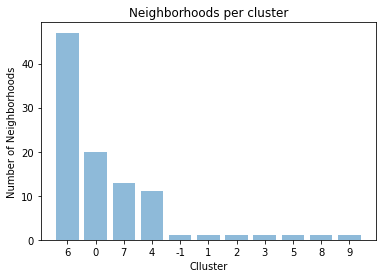

In [195]:
import matplotlib.pyplot as plt
x= clustergroup['Cluster Labels']
y = clustergroup['Neighborhood Count']

y_pos = np.arange(len(x))
plt.bar(y_pos, y, align='center', alpha=0.5)


plt.xticks(y_pos, x)
plt.ylabel('Number of Neighborhoods')
plt.xlabel('Clluster')
plt.title('Neighborhoods per cluster')


plt.show()

Chicago has 4 clusters that have similar neighborhoods.

## Cluster 0

In [41]:
chicago_merged.loc[chicago_merged['Cluster Labels'] == 0, chicago_merged.columns[[0] + list(range(4, chicago_merged.shape[1]))]]

,pri_neigh,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Grand Boulevard,Train Station,Art Gallery,Performing Arts Venue,Grocery Store,Smoke Shop
4,Humboldt Park,Music Venue,Grocery Store,Donut Shop,Video Store,Art Gallery
6,North Lawndale,Convenience Store,Construction & Landscaping,BBQ Joint,Falafel Restaurant,Empanada Restaurant
16,West Pullman,Pool,Restaurant,Grocery Store,Caribbean Restaurant,Currency Exchange
18,New City,American Restaurant,Brewery,Optical Shop,Grocery Store,Intersection
19,Englewood,Fast Food Restaurant,Seafood Restaurant,Liquor Store,Park,Women's Store
20,Grand Crossing,Currency Exchange,Convenience Store,Liquor Store,Fast Food Restaurant,Lounge
22,Mount Greenwood,Dry Cleaner,Deli / Bodega,Ice Cream Shop,Park,Gym / Fitness Center
23,Morgan Park,BBQ Joint,Discount Store,Currency Exchange,Empanada Restaurant,Escape Room
31,Douglas,Fast Food Restaurant,Cosmetics Shop,Wings Joint,Fried Chicken Joint,Gym / Fitness Center


## Cluster 1

In [42]:
chicago_merged.loc[chicago_merged['Cluster Labels'] == 1, chicago_merged.columns[[0] + list(range(4, chicago_merged.shape[1]))]]

,pri_neigh,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
90,Galewood,Currency Exchange,Women's Store,Farm,Escape Room,Ethiopian Restaurant


## Cluster 2

In [43]:
chicago_merged.loc[chicago_merged['Cluster Labels'] == 2, chicago_merged.columns[[0] + list(range(4, chicago_merged.shape[1]))]]

,pri_neigh,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
64,South Deering,Bike Trail,Women's Store,Farm,Escape Room,Ethiopian Restaurant


## Cluster 3

In [44]:
chicago_merged.loc[chicago_merged['Cluster Labels'] == 3, chicago_merged.columns[[0] + list(range(4, chicago_merged.shape[1]))]]

,pri_neigh,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
14,Calumet Heights,Gym / Fitness Center,Women's Store,Eastern European Restaurant,Empanada Restaurant,Escape Room


## Cluster 4

In [45]:
chicago_merged.loc[chicago_merged['Cluster Labels'] == 4, chicago_merged.columns[[0] + list(range(4, chicago_merged.shape[1]))]]

,pri_neigh,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
5,Garfield Park,Park,Food,Baseball Field,Trail,Electronics Store
10,Burnside,Food,Intersection,Home Service,Park,Empanada Restaurant
25,Jackson Park,Park,Golf Driving Range,Harbor / Marina,Golf Course,Outdoor Sculpture
32,Museum Campus,Park,Harbor / Marina,Boat or Ferry,Football Stadium,Burger Joint
38,Oakland,Park,Beach,Boutique,Public Art,Climbing Gym
41,Fuller Park,Park,Bus Station,Train Station,Food,Fast Food Restaurant
51,North Park,Sandwich Place,Nature Preserve,Park,Gymnastics Gym,Electronics Store
57,Norwood Park,Park,Chinese Restaurant,Pharmacy,Women's Store,Eye Doctor
61,South Chicago,Food,Park,Train Station,Grocery Store,Burger Joint
73,Edison Park,Theater,Park,Women's Store,Eye Doctor,Empanada Restaurant


## Cluster 5

In [46]:
chicago_merged.loc[chicago_merged['Cluster Labels'] == 5, chicago_merged.columns[[0] + list(range(4, chicago_merged.shape[1]))]]

,pri_neigh,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
71,Beverly,Pub,Women's Store,Falafel Restaurant,Empanada Restaurant,Escape Room


## Cluster 6

In [47]:
chicago_merged.loc[chicago_merged['Cluster Labels'] == 6, chicago_merged.columns[[0] + list(range(4, chicago_merged.shape[1]))]]

,pri_neigh,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
1,Printers Row,Gym / Fitness Center,Pizza Place,Hotel,Clothing Store,Yoga Studio
2,United Center,Stadium,Outdoor Sculpture,Bar,Basketball Stadium,Restaurant
3,Sheffield & DePaul,Coffee Shop,Hot Dog Joint,Sandwich Place,Pizza Place,Theater
8,Armour Square,Chinese Restaurant,Bar,Coffee Shop,Hot Dog Joint,College Rec Center
9,Avalon Park,Pizza Place,Burger Joint,Boutique,Fast Food Restaurant,Sandwich Place
12,Avondale,Bus Station,Food Truck,Chinese Restaurant,Gym,Grocery Store
13,Logan Square,Park,Rental Car Location,Caribbean Restaurant,Latin American Restaurant,Bar
15,East Side,Rental Car Location,Pizza Place,Post Office,Currency Exchange,Automotive Shop
17,Garfield Ridge,Pizza Place,Boutique,Pharmacy,Intersection,Fast Food Restaurant
21,Ashburn,Cosmetics Shop,Pizza Place,Light Rail Station,Automotive Shop,Cycle Studio


## Cluster 7

In [48]:
chicago_merged.loc[chicago_merged['Cluster Labels'] == 7, chicago_merged.columns[[0] + list(range(4, chicago_merged.shape[1]))]]

,pri_neigh,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
7,Little Village,Mexican Restaurant,Dessert Shop,Art Gallery,Food & Drink Shop,Dance Studio
11,Hermosa,Mexican Restaurant,Park,Bakery,Arcade,BBQ Joint
44,Portage Park,Ice Cream Shop,Mexican Restaurant,Convenience Store,Intersection,Coffee Shop
52,Albany Park,Mexican Restaurant,Bakery,Korean Restaurant,Taco Place,Chinese Restaurant
76,Lower West Side,Pizza Place,Mexican Restaurant,Grocery Store,Boat or Ferry,Supermarket
78,Archer Heights,Mexican Restaurant,Park,Grocery Store,Coffee Shop,Mobile Phone Shop
79,Brighton Park,Mexican Restaurant,Pizza Place,Grocery Store,Taco Place,Currency Exchange
80,Mckinley Park,Mexican Restaurant,Diner,Video Store,Chinese Restaurant,Gas Station
82,West Town,Mexican Restaurant,Bar,Thai Restaurant,Korean Restaurant,Wine Shop
84,West Elsdon,Mexican Restaurant,Ice Cream Shop,Gas Station,Supermarket,Donut Shop


## Cluster 8

In [49]:
chicago_merged.loc[chicago_merged['Cluster Labels'] == 8, chicago_merged.columns[[0] + list(range(4, chicago_merged.shape[1]))]]

,pri_neigh,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
29,Hegewisch,Park,Lounge,Women's Store,Falafel Restaurant,Empanada Restaurant


## Cluster 9

In [50]:
chicago_merged.loc[chicago_merged['Cluster Labels'] == 9, chicago_merged.columns[[0] + list(range(4, chicago_merged.shape[1]))]]

,pri_neigh,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
27,Pullman,History Museum,Football Stadium,Rest Area,Women's Store,Eye Doctor


Let's do a deeper dive into the similarities of Cluster 0, 4, 6, 7

In [214]:
# Taking the top 5 most common venues and stacking on top of each other
chi_df1 = chicago_merged[['pri_neigh','Cluster Labels', '1st Most Common Venue']]
chi_df1 = chi_df1.rename(columns={'1st Most Common Venue': 'Venue'})
chi_df2 = chicago_merged[['pri_neigh','Cluster Labels', '2nd Most Common Venue']]
chi_df2 = chi_df2.rename(columns={'2nd Most Common Venue': 'Venue'})
chi_df3 = chicago_merged[['pri_neigh','Cluster Labels', '3rd Most Common Venue']]
chi_df3 = chi_df3.rename(columns={'3rd Most Common Venue': 'Venue'})
chi_df4 = chicago_merged[['pri_neigh','Cluster Labels', '4th Most Common Venue']]
chi_df4 = chi_df4.rename(columns={'4th Most Common Venue': 'Venue'})
chi_df5 = chicago_merged[['pri_neigh','Cluster Labels', '5th Most Common Venue']]
chi_df5 = chi_df5.rename(columns={'5th Most Common Venue': 'Venue'})


chi_df = (chi_df1, chi_df2, chi_df3, chi_df4, chi_df5)
chi_df = pd.concat(chi_df)
chi_df.head()


,pri_neigh,Cluster Labels,Venue
0,Grand Boulevard,0,Train Station
1,Printers Row,6,Gym / Fitness Center
2,United Center,6,Stadium
3,Sheffield & DePaul,6,Coffee Shop
4,Humboldt Park,0,Music Venue


Counting the instances of each venue per Cluster

In [225]:
chigroup = chi_df.groupby(['Cluster Labels','Venue'])['pri_neigh'].count().reset_index()
chigroup = chigroup.sort_values(by = 'pri_neigh', ascending=False)
chigroup = chigroup.rename(columns={'pri_neigh': 'Venue Count'})
chigroup.head()

,Cluster Labels,Venue,Venue Count
176,6,Pizza Place,23
129,6,Coffee Shop,17
116,6,Bar,16
218,7,Mexican Restaurant,13
97,4,Park,11


## Cluster 6 top 10 Venues

In [226]:
chigroup.loc[chigroup['Cluster Labels'] == 6].head(10)

,Cluster Labels,Venue,Venue Count
176,6,Pizza Place,23
129,6,Coffee Shop,17
116,6,Bar,16
182,6,Sandwich Place,8
158,6,Hotel,7
125,6,Café,7
161,6,Italian Restaurant,7
167,6,Mexican Restaurant,6
144,6,Fast Food Restaurant,6
111,6,American Restaurant,6


## Cluster 0 top 10 Venues

In [227]:
chigroup.loc[chigroup['Cluster Labels'] == 0].head(10)

,Cluster Labels,Venue,Venue Count
45,0,Park,6
24,0,Fast Food Restaurant,5
30,0,Grocery Store,5
8,0,Bus Station,4
1,0,American Restaurant,4
38,0,Liquor Store,4
18,0,Discount Store,3
19,0,Donut Shop,3
3,0,BBQ Joint,3
15,0,Currency Exchange,3


## Cluster 7 top 10 Venues

In [228]:
chigroup.loc[chigroup['Cluster Labels'] == 7].head(10)

,Cluster Labels,Venue,Venue Count
218,7,Mexican Restaurant,13
214,7,Grocery Store,3
222,7,Pizza Place,3
204,7,Chinese Restaurant,3
215,7,Ice Cream Shop,3
201,7,Bakery,2
205,7,Coffee Shop,2
217,7,Korean Restaurant,2
228,7,Taco Place,2
227,7,Supermarket,2


## Cluster 4 top 10 Venues

In [229]:
chigroup.loc[chigroup['Cluster Labels'] == 4].head(10)

,Cluster Labels,Venue,Venue Count
97,4,Park,11
86,4,Food,4
103,4,Train Station,3
76,4,Burger Joint,2
83,4,Empanada Restaurant,2
82,4,Electronics Store,2
84,4,Eye Doctor,2
90,4,Grocery Store,2
92,4,Harbor / Marina,2
104,4,Women's Store,2


Conclusions:
Although Chicago is a diverse city, clustering the venues using the k-means method produced 4 distinct clusters that are similar in many ways.